In [ ]:
### 1. 지역별 총 인구수 Top5
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# 1. 데이터 불러오기
df = pd.read_csv('../data/인구현황.csv', encoding='utf-8')

df_region = df[df['행정기관'] != '전국'].copy()

# 3. 총인구수 기준 내림차순 정렬 및 상위 5개 추출
top5_region = df_region.sort_values(by='총인구수', ascending=False).head(5)
top5_region[['행정기관', '총인구수']]

,행정기관,총인구수
9,경기도,13694685
1,서울특별시,9331828
2,부산광역시,3266598
16,경상남도,3228380
4,인천광역시,3021010


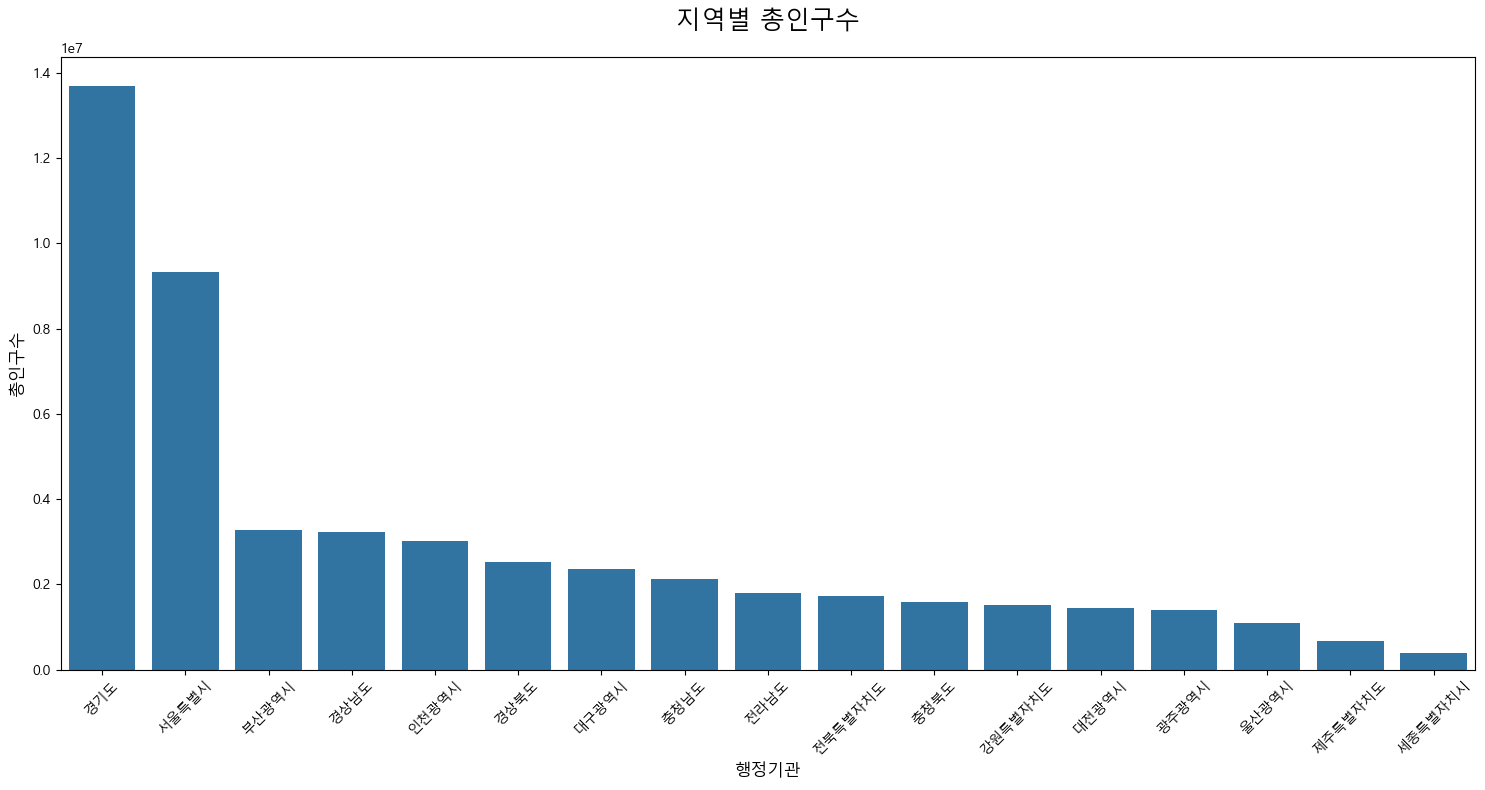

In [ ]:
### 1.1 지역별 총 인구수 plot
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv('../data/인구현황.csv', encoding='utf-8', thousands=',')

# 2. '전국' 행 제외 및 정렬
df_region = df[df['행정기관'] != '전국'].copy()
df_sorted = df_region.sort_values(by='총인구수', ascending=False)

# 3. 한글 폰트 설정 (Windows: 'Malgun Gothic', Mac: 'AppleGothic')
plt.rcParams['font.family'] = 'Malgun Gothic'
plt.rcParams['axes.unicode_minus'] = False

# 4. 그래프 그리기
plt.figure(figsize=(15, 8)) # 그래프 크기 조절

# sns.barplot을 사용하여 지역별 총인구수 시각화
sns.barplot(data=df_sorted, x='행정기관', y='총인구수')

# 5. 세부 설정
plt.title('지역별 총인구수', fontsize=18, pad=20)
plt.xlabel('행정기관', fontsize=12)
plt.ylabel('총인구수', fontsize=12)

# x축 지명들이 겹치지 않도록 45도 회전
plt.xticks(rotation=45)

# 깔끔한 레이아웃 유지
plt.tight_layout()

plt.show()

In [5]:
### 2. 세대당 인구수 높은 지역 Top5
# 세대당 인구 기준 내림차순 정렬 (df_region은 이전 셀에서 생성된 전국 제외 데이터)
df_household = df_region.sort_values(by='세대당 인구', ascending=False)

# 상위 5개 추출 및 인덱스 재설정 (0~4)
top5_household = df_household[['행정기관', '세대당 인구']].head(5).reset_index(drop=True)

# 결과 출력
top5_household

,행정기관,세대당 인구
0,세종특별자치시,2.39
1,경기도,2.26
2,울산광역시,2.22
3,인천광역시,2.20
4,대구광역시,2.14


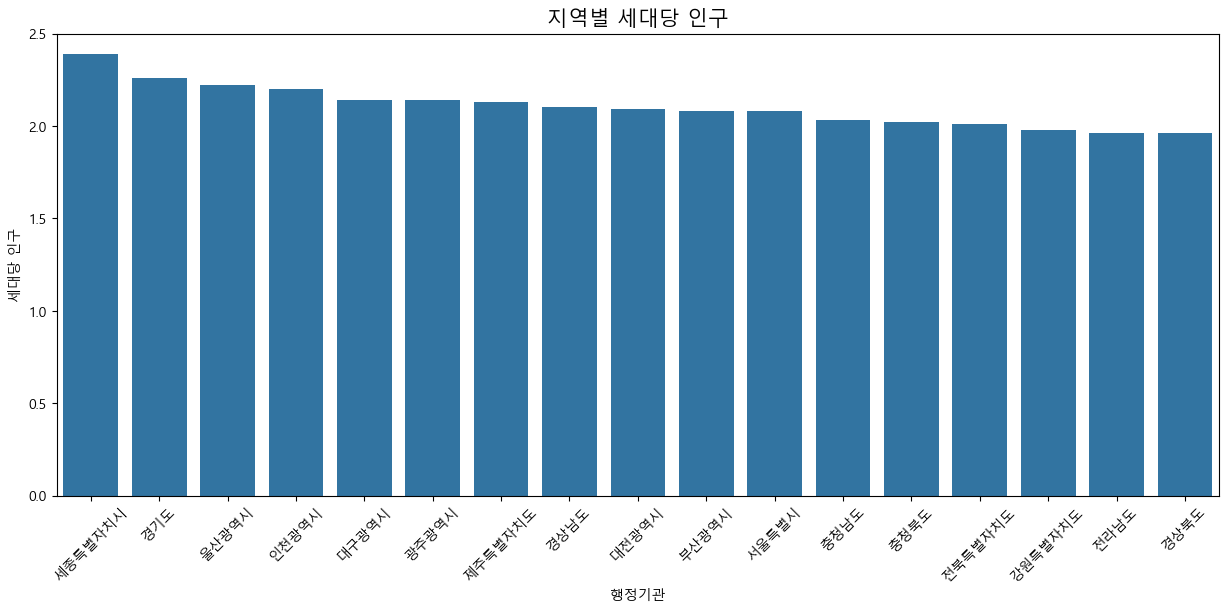

In [ ]:
### 2-1. 지역별 세대당 인구 Plot
import matplotlib.pyplot as plt
import seaborn as sns

plt.rcParams['font.family'] = 'Malgun Gothic'
plt.rcParams['axes.unicode_minus'] = False

# 그래프 크기 설정
plt.figure(figsize=(15, 6))

# 막대 그래프 생성 (정렬된 df_household 데이터 사용)
sns.barplot(data=df_household, x='행정기관', y='세대당 인구')

# 제목 및 라벨 설정
plt.title('지역별 세대당 인구', fontsize=15)
plt.xlabel('행정기관')
plt.ylabel('세대당 인구')

# x축 라벨 45도 회전 및 y축 범위 설정
plt.xticks(rotation=45)
plt.ylim(0, 2.5)

plt.show()

In [7]:
### 3. 남녀 비율 분석
# '남여 비율' 컬럼을 기준으로 내림차순 정렬 (df_region 사용)
df_gender_ratio = df_region.sort_values(by='남여 비율', ascending=False)

# 행정기관과 남여 비율 컬럼만 선택하고 인덱스 재설정
gender_analysis = df_gender_ratio[['행정기관', '남여 비율']].reset_index(drop=True)

# 결과 출력
gender_analysis

,행정기관,남여 비율
0,울산광역시,1.06
1,충청남도,1.05
2,충청북도,1.04
3,경상남도,1.02
4,경상북도,1.02
5,전라남도,1.02
6,경기도,1.01
7,강원특별자치도,1.01
8,제주특별자치도,1.00
9,인천광역시,1.00


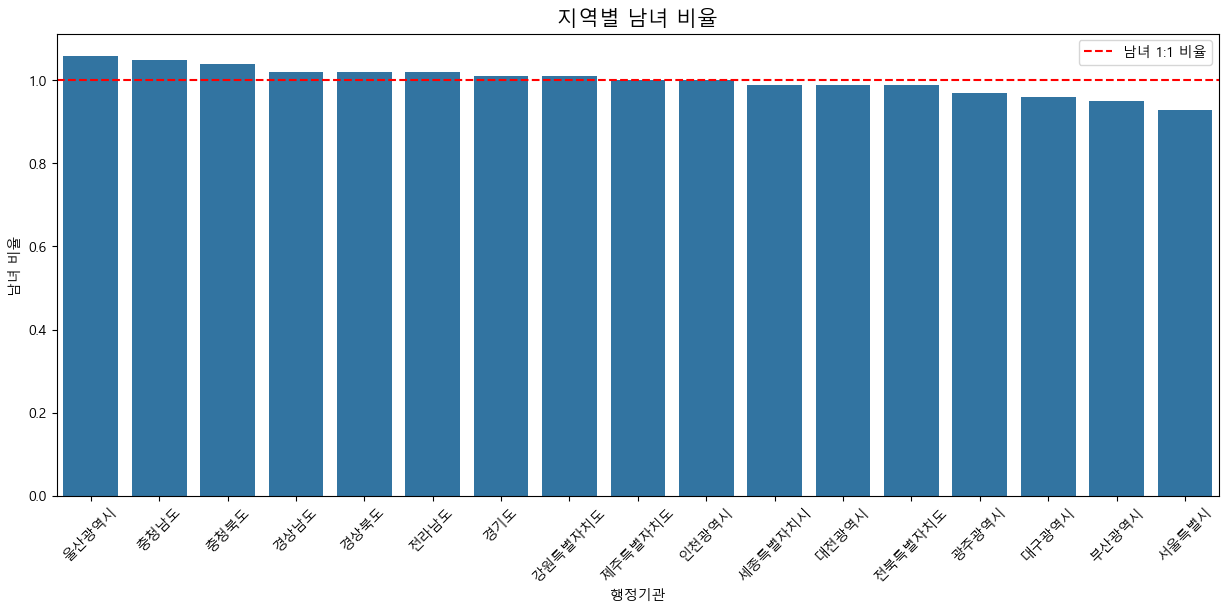

In [8]:
### 3-1. 지역별 남녀 비율 Plot
import matplotlib.pyplot as plt
import seaborn as sns

# 한글 폰트 설정
plt.rcParams['font.family'] = 'Malgun Gothic'
plt.rcParams['axes.unicode_minus'] = False

# 그래프 크기 설정
plt.figure(figsize=(15, 6))

# 막대 그래프 생성 (3번에서 정렬한 df_gender_ratio 사용)
sns.barplot(data=df_gender_ratio, x='행정기관', y='남여 비율')

# 기준이 되는 빨간색 점선 추가 (y=1.0 지점)
plt.axhline(y=1.0, color='r', linestyle='--', label='남녀 1:1 비율')

# 제목 및 라벨 설정
plt.title('지역별 남녀 비율', fontsize=15)
plt.xlabel('행정기관')
plt.ylabel('남녀 비율')

# x축 라벨 45도 회전 및 범례 표시
plt.xticks(rotation=45)
plt.legend()

plt.show()

In [ ]:
### 4. 남초여초 컬럼 생성 및 결과 출력
import numpy as np

def get_gender_status(ratio):
    if ratio > 1:
        return '남초'
    elif ratio < 1:
        return '여초'
    else:
        return '동일'

# apply 함수를 사용하여 새로운 컬럼 추가
df_region['남초여초'] = df_region['남여 비율'].apply(get_gender_status)

# 2. 결과 출력 (이미지 순서와 맞추기 위해 행정기관 순으로 출력)
result_4 = df_region[['행정기관', '남여 비율', '남초여초']]

# 결과 확인
result_4

,행정기관,남여 비율,남초여초
1,서울특별시,0.93,여초
2,부산광역시,0.95,여초
3,대구광역시,0.96,여초
4,인천광역시,1.00,동일
5,광주광역시,0.97,여초
6,대전광역시,0.99,여초
7,울산광역시,1.06,남초
8,세종특별자치시,0.99,여초
9,경기도,1.01,남초
10,강원특별자치도,1.01,남초


In [10]:
### 5. 평균 세대당 인구수 이상 지역 필터링 및 정렬
avg_household_pop = df_region['세대당 인구'].mean()
print(f"전국 평균 세대당 인구수: {avg_household_pop:.2f}")

# 2. 평균보다 높은 지역만 필터링
df_above_avg = df_region[df_region['세대당 인구'] > avg_household_pop].copy()

# 3. 세대당 인구 기준 내림차순 정렬
df_above_avg_sorted = df_above_avg.sort_values(by='세대당 인구', ascending=False)

# 4. 필요한 컬럼만 선택 및 인덱스 재설정하여 출력
result_5 = df_above_avg_sorted[['행정기관', '세대당 인구']].reset_index(drop=True)
result_5

전국 평균 세대당 인구수: 2.11


,행정기관,세대당 인구
0,세종특별자치시,2.39
1,경기도,2.26
2,울산광역시,2.22
3,인천광역시,2.20
4,대구광역시,2.14
5,광주광역시,2.14
6,제주특별자치도,2.13


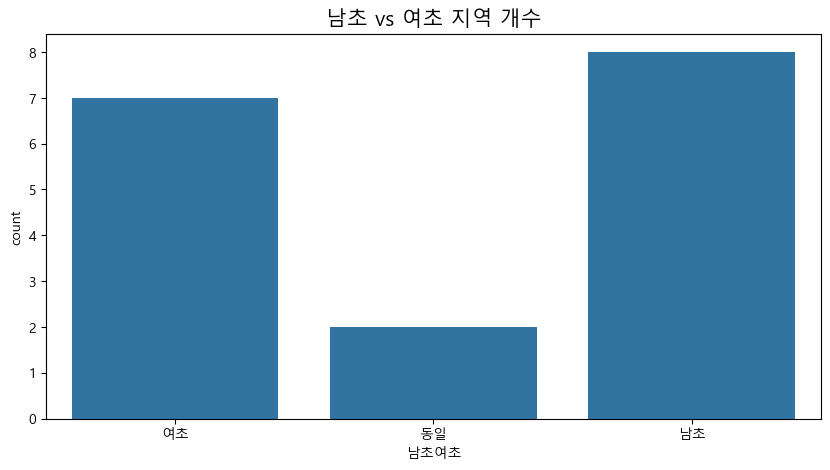

In [11]:
# 5-1. 남초 vs 여초 개수 Plot
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 5))

# countplot은 데이터의 개수를 자동으로 계산해줍니다.
sns.countplot(data=df_region, x='남초여초')

plt.title('남초 vs 여초 지역 개수', fontsize=15)
plt.xlabel('남초여초')
plt.ylabel('count')

plt.show()

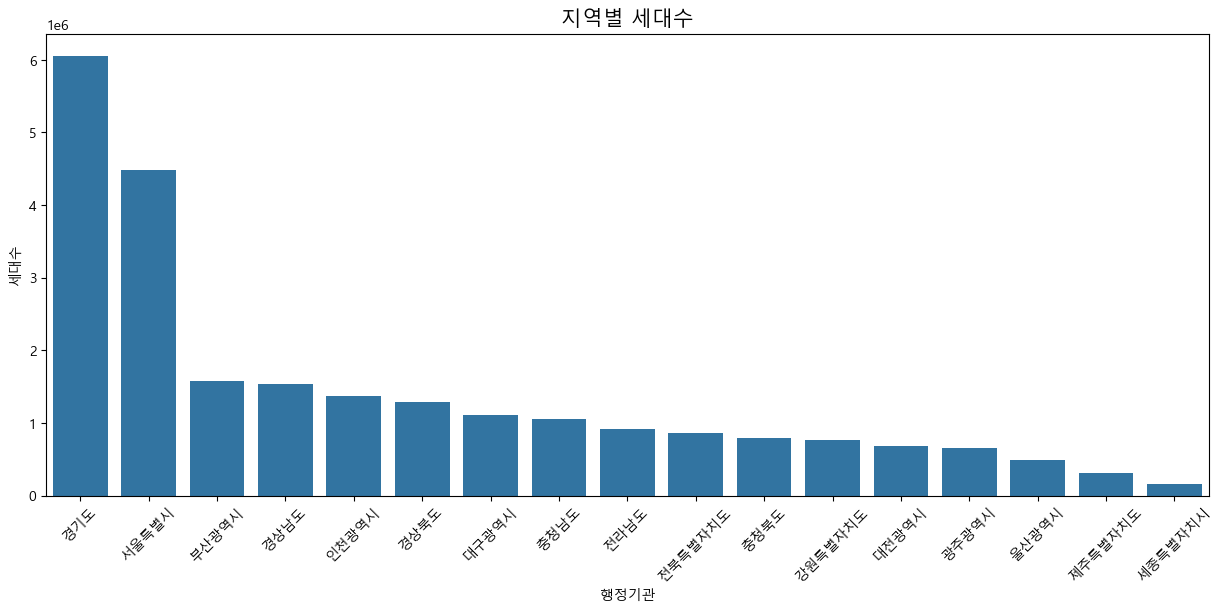

In [12]:
# 5-1. 지역별 세대수 Plot
# 세대수 기준 내림차순 정렬
df_household_count = df_region.sort_values(by='세대수', ascending=False)

plt.figure(figsize=(15, 6))

# barplot으로 지역별 세대수 시각화
sns.barplot(data=df_household_count, x='행정기관', y='세대수')

plt.title('지역별 세대수', fontsize=15)
plt.xlabel('행정기관')
plt.ylabel('세대수')

# x축 이름 회전
plt.xticks(rotation=45)

plt.show()

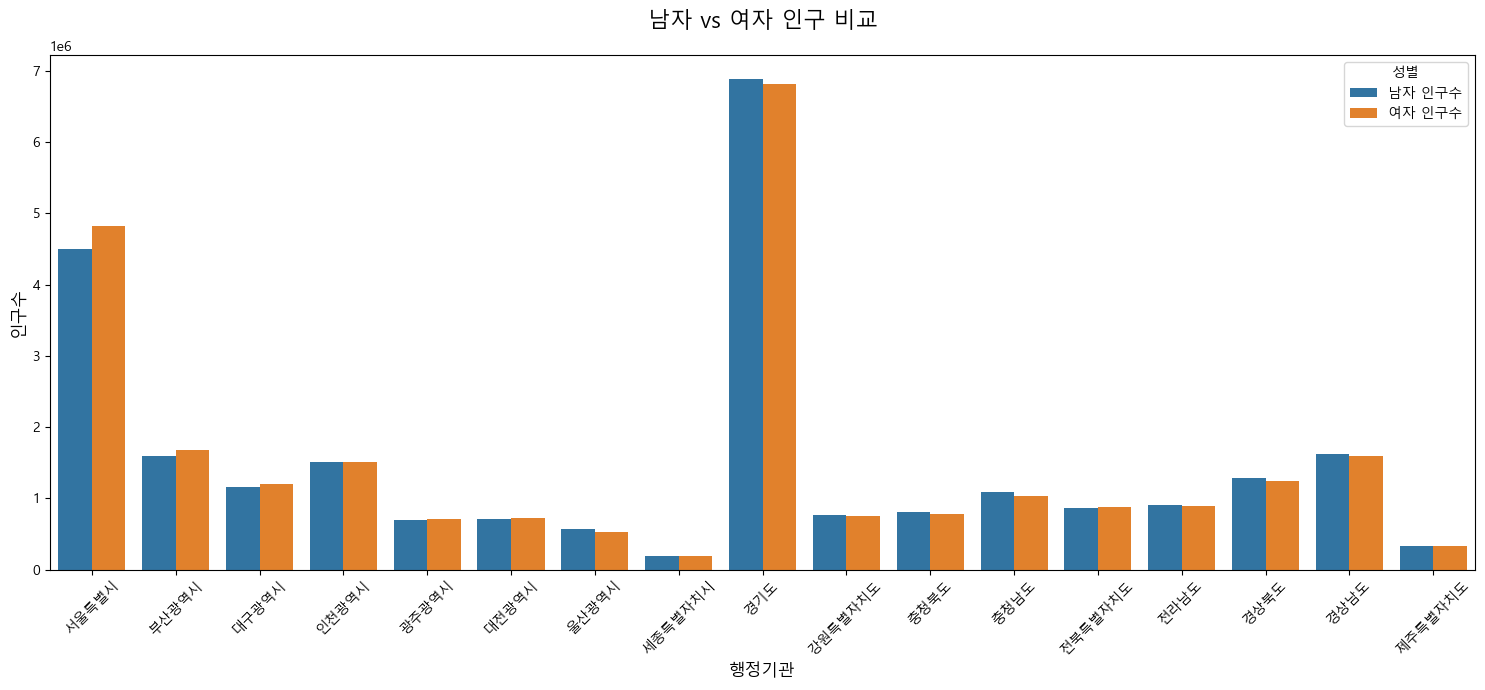

In [ ]:
### 6. 남자 vs 여자 인구 비교 Plot
import matplotlib.pyplot as plt
import seaborn as sns

# 1. 시각화를 위한 데이터 재구조화 (Wide to Long format)
df_melted = df_region.melt(id_vars='행정기관', 
                           value_vars=['남자 인구수', '여자 인구수'], 
                           var_name='성별', 
                           value_name='인구수')

# 2. 그래프 그리기
plt.figure(figsize=(15, 7))

# hue='성별' 옵션을 주면 남자와 여자가 다른 색상으로 나란히 표시됩니다.
sns.barplot(data=df_melted, x='행정기관', y='인구수', hue='성별')

# 3. 그래프 세부 설정
plt.title('남자 vs 여자 인구 비교', fontsize=16, pad=20)
plt.xlabel('행정기관', fontsize=12)
plt.ylabel('인구수', fontsize=12)

# x축 라벨 회전 (지명이 겹치지 않게)
plt.xticks(rotation=45)

# 범례 위치 최적화
plt.legend(title='성별')

plt.tight_layout()
plt.show()